---
---
# Video Object Detection using YOLO - German Tourism Monitoring
---
---

## Lab Overview

This lab provides a hands-on approach to understanding and implementing state-of-the-art object detection techniques for monitoring tourist activities at important German landmarks. You will learn to detect and track people, vehicles, and objects in video footage from popular tourist destinations such as Brandenburg Gate, Neuschwanstein Castle, and Cologne Cathedral.

### Learning Objectives:
- Implement YOLO for real-time object detection in tourism surveillance
- Process video footage from German tourist attractions
- Analyze crowd density and tourist behavior patterns
- Create automated monitoring systems for heritage site protection

## Setup and Installation

First, let's install the required packages for our German tourism monitoring system.

In [ ]:
!pip install ultralytics opencv-python

In [1]:
import cv2
import urllib.request
import torch
import matplotlib.pyplot as plt
import requests
import urllib.request
import numpy as np
%matplotlib inline

## Load Data

In this section, we'll download sample images and videos from German tourist attractions for our object detection exercises.

### Download Sample Images

Let's start by downloading sample images from German landmarks for initial testing.

In [ ]:
# TODO: Download sample images of German tourist attractions
# Create a directory for sample data
# Download images from URLs or use sample tourism images
# Suggested locations: Brandenburg Gate, Neuschwanstein Castle, Cologne Cathedral

import os
import urllib.request

# Create directories
os.makedirs('german_tourism_data/images', exist_ok=True)
os.makedirs('german_tourism_data/videos', exist_ok=True)
os.makedirs('german_tourism_data/results', exist_ok=True)

# TODO: Add code to download sample images
# Example German tourist attractions (replace with actual URLs)
sample_images = {
    'brandenburg_gate.jpg': 'https://www.pexels.com/search/videos/germany/',
    'neuschwanstein.jpg': 'https://www.pexels.com/search/videos/germany/',
    'cologne_cathedral.jpg': 'https://www.pexels.com/search/videos/germany/'
}

# YOUR CODE HERE
# Download each image and save to the images directory


Sample Images

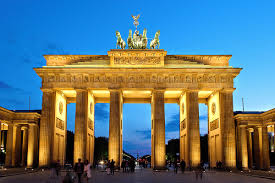

In [2]:
# Download the image from the URL

url = 'data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxISERUTEhIWFRUVFxcWGBUVFRYXFxcXGBgXFhYXFxUYHSogGBolHRcXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0mICUtLy0tLS0tLS0tLS0tLS0tLS0tLS0vLS0tLS0tLy0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBEQACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAABAgMEBQYHAAj/xABLEAABAwIDAwgFCQQHCAMAAAABAAIRAyEEEjEFQVEGEyJhcYGRoRQyscHRByNCUmJysuHwJDNTkhVjgqKz0vElQ3ODk6PC0xY0w//EABsBAAIDAQEBAAAAAAAAAAAAAAABAgMEBQYH/8QAPBEAAgECAgQKBwcFAQAAAAAAAAECAxEEIQUSMUETIjJRYXGBkbHBFSNTkqHR8AYUJEJScuEzNENi8YL/2gAMAwEAAhEDEQA/AM4vankwoFcKBXCgVwgJiuEBAgwgAwgQqECCAgAgIEKAQMMIAUAgAgJiuKAQFwgIAUAgAgIEGEAKAQAYQIICACAgBQCAuEBABhIQYQAYQAYQAYQAYQB6EhhhABhAGYQaRUIEehAhQQIMJiDCBBhACoQIICBBAQAoBABAQAoBABAQAoBABAQAsNUXUiparee3sJKnJx1knbZ2izSIAJETp1pRqwlJxi7tbei45UpxipSVk9nTYACmVhAQIMIAUAgAgIEKhABAQMVCBBhAwgIEGEhhhAHoSAMIuAYQB6EgDCBmXCkX3CAgiEBACoQRCAmAQECFAIEEBACgEDCAgQqEAEBACoQAQEAKAQAQECLDYxcKnRAMtIIMi3aLi8aReLjVcvS1GE6SqPlRfFfS93U950tF1ZxquC2NZrq39aE7Ra4Ph1rWAMgDT3R3I0RThHD3je7d5X23/wCbPmLSs5uvZ7Esrc30iNC6hzQgIAUAgAgIAUAgAgIAUAgAgJAEBK4BhABASAMIGGEAHKkB6EAGEDPQkBlVMtCECFBAggJiFAIEKATAICAFAIEEBACgEAEBAhQCBhAQIUAgBQaq5VYRkoSaTexc/UTUJSi5JZLaGFYVkpuEqAs6M85Zo+tMCPMeKxqvQrqpB7Iu0uj65zUqVajKEo7ZZq310nqzHOfEamGgGR6xADToRO/ejCTpRw6cGrJZ257Xd+keLjUeIane7eV+a+Vug9iMM5hyuEH8yPcngsXHFUlVirFeKw7oVNRu4hrVbXxFOhHXqOyIUqM6stWCuwgK25WKAQAQEAKAQAQErgKhK4BAQAYSuMMIuAYSuB6EXAMJDDCADCLgehIZklaTPAJDYsBMgxSYJBakFhQCYCwECCAmIUAgBUIAICAFAIEEBACgECLLYlYU6mcx0QTBBLSCIcCARJ0gG11537Q0nwcaydtXLtbVu6zOxoiraUqdtvlf5jGJwhbUytBgkZJ1c116Z7wR4rr4bGQrUFWvuu+jLM59fDTp1XTS35dN9n1zl3sttKoWyQ+mznKcmYzuaywh0kkExHBeO+/SUKjg85VFLs4zXc0rnpY4VKcNZZKLXfZeFyFg6NRlamX/ADoAL2ODRThtI5oJzQfWbLjcklEMfUp0JUo7GpX6dZWv2dG7qLKuDpzqcK9qtboswbUaHOY9rmlrmNgh7D6vRdvj1gT3r0Ggq0XhErZpu+Xb4HC0rSkq+s96W9D+HpmnSHRPTLiZbYhvqgOixDmu04rm6UqQxWOp0Nbi7O1+exGzA05YfDTqNZ5vsWwrA1etPPhASAUAi4xQalcAgJXAICVwDCAFQlcYcqLgHKkFj0IuAYQMMJXAOVFwPZUgsZCFeMAYlYesONTIikAFoQB4oGJbWRcdh9pTuRY4AmIUAgAgIEKAQK4QEAKAQAqtn5qo1jspeAyYHHPad/QXH0xQlXhGnG21vrsti72dPRlWFKcpz2ZLv5/reWuJ2qHMDasGtTrvYHUxDW0qRDWgWsPf5cLRXCKq6DyTjJPotlfsfwZ19JKHBxqrammu+9u1Fdybx1Oh0Hkua/ptc4PaOda6mXAHVoylwkdfrRA5Wq4ytJdHj5po6DkpK6NHtPlBg3UnsLWs6FJmYyXdPm+iAAb5swIGuUpOWVl9c/mNZ7Sr2TUoZ6OY5qTM8yNReGZQNSQLcXdS7WDnKjo6pOKzb7bXSv4+Jy8XarjqcXuXx2krEbWdiH06wOVha9gbkgtaMzHgz6rgWzYWIInRYsLhakqnC7NWUUr890krfWRqxdaEYKHOm8uazzuVoavd3PHBDUrjFAIuAQErjFBqQBDUBYVCVxhhIAgIAOVIYcqLgehIAwi4BDUDPZUAYxaBBBQDQsBAhQMoCx4IA86Jib8FnrYuhRdqk1F9LsaKOFrVlenBtdAtlOT6p8FR6TwXtY96LvRuM9nIWaZG48RYp+lMF7aPvIXo3F+yl3D1EFxgNPgUelsD7aPvIPRmL9nLuHMnUbdRT9K4L20PeRH0bjPZS7mLFPt8Cl6VwXtoe8vmL0bjPZS7mK5pP0pgvbQ95fMXo3Geyl7rEucxvrPaO1wHtUlpHCPZVh7y+YvR+LX+Kfuv5EjB4QV8zWVBIichBInQzMDQ68F5/TmmpUdWGHlFqSd2nmmupnb0RomM7zxEZJp5JrJq3M1mSsPyce8WqukwQCG3zCReI0PHiF5iWmMTezm/efzPQLR+GSuqcbftXyBh9g1HNBbVcJh0Fovma28gRMBo13DgqnpSvCbabu9ruyx4KhKCTirLYrKy7Bn/AOOk6uNw0w5jDPrZfokWzO1Nsx4qqpj6kXZ+L+ZZDDU2rpfBfI9S5Lh46Rga3ZTmxi0NMXb5JPGyi7PxfzGsPBrLwRJw/J7o9F7gGyIyU9GuLYGVptLTAVnpCrG8c89ub6+ch91pSak0rrZksurIcOw6jpPOObBd9FmonMRlB3k9slS9J4inyW883m/q5D7lh57YrLLYvkNVMNzTXOq1IAMS8NA+joWmB6wF10tG6dxPDxpt3Umr6zbss7vN5ZeRz8dojDSpOcI2cU7aqSu927MjsxtA2FamSeDwV7V6Qwy21I96PJej8V7OXcx9r2bnBQ9KYT2sfeRL0bi/ZS91iw5v1gl6UwftY+8g9HYv2UvdYDVYPpjxR6Twj/yx95B6Oxfspe6xIxNL+Iz+YJ+kcL7WPvIPR+K9lL3X8g+k0v4jP5gj0jhfax95fMPR+K9lL3X8jxxlEa1WfzBL0hhfaR70P0fivZS91iTtCiNarP5gj0hhn/kj3ofo/Feyl3MlALXcyWDlRcAwlcLBhFx2DlRcdj2VK4jEQtREUAmB5wSA8wmbhFx2Q8SN6ZEsNk1BnDfouMH4rh/aDBwrYR1XlKGafl1P63o7Og8TOniVS2qXknmbamxkAEyI0AtYXNrjivm2+92e5ccrC3BkRmGUjSLabjqL31RnrXuLVyt8Sg2pjqbCQMpncBvIAsdRe+uqnGlKUrjdoxsU79pVnksZSPSveWt0vBdEaTqtSoR5TfmUuqlkRRhMY6Q4Bs3vVEcLRUMcVZakndeH8FfCNoTS2JWJdzlSCeDg4aRYZrJuUctVEdbpFjk2IdNSSd8G3YM8DwRwrvs+u4V0PbJ2SGYimMwN4sCJsdb+5Z8TNunLItpNayLraOEqsquy1YaYtIsctIAxqZudyqo6jgrr6zLJSd7oXzNbOWh7jfUOBc4w4EAaRF47LKLUWhqVs2Ko4Wq9jnS4TYiTLJDZH2dCnZRdg1hqm2sx0B2btMDiLSTA9gvvVmrGV3awtawgYKs6CS7pTMOsLWMz0b9qjJxjsQ9u0FWk9oLWl4no5i8yTcWJgTYbuuwIUVnmwukQ+WuBMYeS2CH8eDPircJLlW+tpXVknYq6XJ5j2mXNvv6Yi0Wh1tNy0OtJPYU6qA7k+RIFeD2EbgBeSf0U+GT2xJWy2iBgMXSb0ajHdQqOnQDVxAGniSpPgpPNNdwlOSPUtoYig2ajLGBIc1x9UDc4ncTPWk8PCo+K/gSjWttLnZm2WgXYJMCXC9g0b+sE9pKoq4drIthOLNJsxtKMwDJMawdw1neTJ71mmWapMbg6QkgMnjYmIvqeMnv6lFttWuRSzzKutQp5jDGTxDRPf+uHBdjQWEhiK/rHlHO3Pnv6PE5mmsTPD0OJtk7X5stw0WL6Bc8MeyouMOVFwseyouMOVK4BhFx2MMFtKhUJAFrUALAQI9TY872DtDzbu3rz2kNOVsHV4OVLqd8mu472C0PSxVNTjV61bY+baW+By023ZRe6TDiMQ0+Rhedx2nq+IUo2tBqzjk/ja/xOzhdDUqDUk+Mt/wDF7FoNtVG/Qp3t62I+K42vSf5X3nU1Ki/P8ADargQ0tpwftYgx5pt03sQKNVfn+BOdWLozUsK7rNIk9twnGcIqyT7yt0ZPbL4fyONrH+Fhf+i73hDqLmfeL7u/1fD+RXpT/qYYf8opcLF7n3j+7v8AUKGLf9TDf9Jw9yfCx5n3i+7v9Ql+Nff5vD/yP+Ci5w2595JYd85Gq13SHNZRzDS1SfGFTOUJLf3lkKUovb8B07Wr3PN0Tbi+/i1QjqrJXHwT5x3+mKmWeaonQQQ4e5SvHffvI8C/1fXeNVdrVSQeYw7v5rcL5E247tYapS/UedtWsR+6w990unrnocd6JKLW1gqUk9v13jZx1XfSw/bDj/4qDUOeRJQlz/XeLpbSqiYZQHZnHHq601qPnFwcucbxNd9SM4pOyzAzOETGnRPAKScI5oODludh0Y97bCjTP/Md/wCoqarQ2NMg6Etut9d4DtB/8GkP7bv/AF3UuFhzMToS/V8B2ninuE83R7Jd4+qpKpTa2EeAkvzfAUa7v4eHPef8iblDmfeHAvn+BHxjpALsNhXkaZjpOsTTMaeSfCxS394KjLcyO3EEf7ii3gGVHR5MAHgqpcG3nctUaiWUvgeftEtBHNU+6pU/yIXA8zGlV/V8BujjXGXc1SBO41KnuYFswuKeGk50cm8tzMmKwixEVCq7pO/1Yg4natVp9SnH33zH8mq7sPtC7JOF31/wciX2fV21P4bPiWWFL3Nl7Awk2aHZrbpMC/UvRUKkqkFKUdW+44FenGE3GMta28eyq65VYOVK4WDlRcdj2VFx2MGAtxnFAIAIQAtqBDgYDqAeE/ksGktHQxtLVbtJbHzdfQ95u0fj5YOpfbF7V5rpX8dSKdaXEFjWkQOjpeSNV88r4WrQqSpT2o91RrwrQVSGxk12Jzw3mWgO+mARB4idf9Vn4Fq7uW647gHsglzA7QidbzYRE6Jak3sY20SnVwHtgATlgWy3te0wlaWxjyJbcc05gWBuU2gSSIDrTbem6c1ZiTTI1faTKbSXUw8ZhfQgFoO6N5hRVJtjcrIQ7Fw+JJE6GIjKXROuijabJZDXpIfm1ZlMHibA6HtT4OatmJTQ6zaDGw0snUZt1tJPGI8VF0p3dmPWQh+NDTpm1tAExA171NQm94nJBp49rxOXLBuBffCHCcd9wTTB6Q2Q3XiYMTYxM9fBPUmle4tZMR6XEQ2QdfPfPV5hJwk947oVnBfE2J4CNJ17lHUl2j1kP+kBwuzJc3F5aATr4eKk6Ur2uR1h1mIYwAZM5cRpYgEE33DRR4KY9ZCX1hlLiScpjKAI9YN14CQe5Pg5veLWQ1iKxsCI1m2+RAgzx8lHVlzkk09w/RcJINIQIGYjUkAzbQXhHBu17i1s7DGErtHSyzawDQJJBP0ROgKThJMesmgYrFBxb0MlhaATJmZ10gaHipJS5xXQ8K7cpimIbvJ8XQOq40mU9SS3kboZdiA25ZmvHZaZgd6Fry3jdkR8TXBNmAawI4CTrvUkpLeLImbL2O2oOcqUWtFi2HE5t8kbhpv/AD7+i9GTm1Vqt22pc/8AHj48LSek4wvSpbdjfN/PgXRavW3PL2PZUXHYOVK4WPZUXHYOVFwscwo4gjW633FKmnsJtKoDommZ3FraOgJkQhqAHGGEXttFa+wrWVRzjzmN3C9ogARHiV4DS7/Fzad9ngj3ujI2wsE1bLzZZYAsJDASYEjpGx7FyqjkszoxSLJtFg3Om28jSYVXCS3Meqt54UWWs4RBFydDOqSqO49VEZtdmYgOjSxOg4QrHrWIqw2ebcRLpm0AxIgAjyS4+0fFJbqLMwmR3kHTKL9ijFu42gVqbAbTcRqTIv8AE+KctZbxKzI9dlMRcgni7f39vmpwvJidkRqr2QZeLTpxME7+pT1WtgrreHDkZZaTeJ33tfyVbcm8ySSsSaj2gAZjpI6Q1F9I61J3FkMsq6dInwHH4pS1gVh+lSbYhx4+Ue9K0gyGa1cCYfF7zGhBG6OJTWtYLIXQxDSRmeDusQLQhqQsiyp0mfWJkk6jiHe0JO4WFmjTMXPH1hxngl1h1HqrWtcDmIMzq3dA4dQHckr7B2W0jkNa0Q71coEGNLC/YSlU2AtpIweHpuAJBtHX7utU68uYnqrcSDhGXGZ1wRq3Qg8Ap60ri1UefhGhpdmI3yCN4IO5N3SyFk3mVuLpNF83eTe9vcpxu2Jo0uyB8wwTPRHDTdovbaPf4an1I8TpCP4mfWPFq3XMlj2VO47BypXCx7Ki47ByouFjmXNLpGW7C2mgTY41kaSgQ6HHgmKw8xG0WazQipjGUnBvNsiASYG86GxXz/TOBjRxTjTbSaTtzXvs6Mj3eicXKvhlKazWV+e28bdta/zbA1wm7TAiCe+/YuNOj+pnVjLmOg4XZ1Wm8CoC9hm4OUwBJuCLwDr+awU6ak8kKdbLJ5ltQoYN4Bbm/nd8VJrDvc+8q1sQubuM1yywOGo5alOmCXkg5hmmAIIJns8Fop2llBtWHTlJ317GFq4wB5y02tIuC2xmAZtbfwWmVNqObJxkm8kdG2dsqnTJbiA8i2VwcRrJA14B3gubHVfGksugc5yeVNlqzZWD3Z/53fFSvRfOVa1dcxUcrNn4RmHNQMLywiGv6Qhzg075GoPcraUoXUabd2OLqN8e1jn9bGUQ9oFFonhP63b1udOeq3rMFJXtY2+wcFhywivnDg4gZTAIgOHbZ0dywNxXK37CcnP8tiz/AKNw8dAv7yq3JPYOOvvGRsXD6uLx2H8k1LnG9bcDF7PwjabsjqxeAS0AzJAmI1Urxlkr3ZBOonxrWMNji1lQiowF30id5AHAjz4LVSu1k8hytvRe8isBhq9RznMDMgHq6kmRqSbWKhVerlUk7PmISk0uIszbf0XheL/H8lQ5UudlfCVuZEHamHohhFLnC7t6wJMCdSB2kKN4vkX6S2DqX49jE7arcxULarczhlG62YBxHG08dytoRlLkstcla5J2DXo4iqym+mGh5IJkmAASd/2fNXTpuObkyt1MnZG4GysI1sBzgB1j4LK+Bbu2yuNSvsSRBxdNlhhw9/SykmIDtcthrAPZ2ocVa8E7dJZGcv8AJYyfKis+i/m60ubla4gQBcvEEbx0FOlHWzX1sJ6yaGKO26ZaOgCb8d3YYV3AS5xa6NVs3B02MzMaAaga5xG+0juEnxXtdH4WOHpJLa82+c8bj8TPEVXrbFdJc3/STlXQuYrBypXHY8GouFg5UrjseyouFjlwcV1TCDOeCAshxlYIDVHCdO33FRk9nWOKWfV8h9hUytoqdoVBzz5v6tu668bprjYt9S8D2WheLhI9b8WMbHpzVaOLgPMrhYhZHYps+hMzIbTfq4WHs77HwKy0oQcFGW8xPW1nKO45ZtvDvpYuoynWcwAiBmcAZaHWAtN47lGlQnV4kIa0uhXZueIhCGvUkorpdkV+16z8rBUql/rRLi6NOK008LWoSfCwcb7Lpq/eQWIo1l6qSlbbZp+BnaZzPd1g/hCurW1ESpco7Ny0a1+FeGmKlPI62ok2PvXM1YqMX9WKqDkpvmZi8PWqBo/aR31Pir3ozFvNUJe6/kWffsLezqx95fMj7Yr1DQdmq5m2tmneE6eCxFOalUpSiudxaXfYk8VQnxYTTfMmn5mNq1hzjNdR7Sug+QypcpGy2qKxxM0HODebp5o0zgFp/CufChKcMoN57k34FnCwhypJdbSFt9Mj947y+CX3Op7N+6/kP7zS/Wu9Hh6b/Ed5fBH3Sfs33P5B95p/rXeiDUZjC5vOPcWFzQ6wiC4AzYcVL7u4pt02utMfDQbspLvRE5YVCcU/KbOMjdY/krcLDi5kZyyR7kpXxEvFJxB6MwJtLurrRi6Dna0W+pPyCnUhHlNLrZpcTWxm6o/wHwWCOEqb6cu6XyLXXor8y70WXyfh5q1n4h5Jp5fWtEnSO0E94VipxU0mrc5TiJ60OI73KL5SaZ9KqdrPDKArMPlJ9o4f0kUuxDUFRuQw+TBFz3DxV9aLlBpK4RaTz2FvtqrjQz985pkCS1o7QCRrErHCioO9Sm7dKZbwkZZQkuyx0bkpgKeGw9MOd0n3k7yb2VlBRb1p79hhxE5TdlsRjPlPpftA62NHganxUaeUn1mih/TMPTgN10zbuJW+7FY6psoTh6J/qqf4QvYUX6uPUjxtaNqsl0vxHaM5ngnQiNLAtHvlTTzZFxyX1vH8qdwsHKi47ByIuFg5ErhY5E2poJv9V4yO7p6Lu0EaLBhvtC9leP8A6j5r+ew6OI0EttGXZL5/x2gq42mw5ajiwwT02uaDHBxEE9QN12aWksLVV4Tv2O/dtOXPRmKg+NG3avmRBt3DfxP7j/8AKr/vVLn+DKvuVbm+K+Yo8oMNb5zf9R/A/ZUZYmndZ/B8zJRwda0st3OuddJ7/wCU4UH1yexjz7kpY2jHa33MS0fXe74oiYnEiq81Kc5XCQSDewBt3LyOkKsauJnKOy68D1eAoulh4RltXzuTuTRJxFKf4jR/ej3rlYnkvqOhTO1bQcfS6IgwWs045nEz4eawu/q7fWa+ZTTtqy7fAx3KU/tuI++3/Cpr3X2bilhZO2eu/BHltNybqwW7UXjIzO3HiWTwd7ln+0L49Pqfijd9n48So+leDKnZ7RzoHYPYvOVuQeip8o6pyotTxrtDlpcdIpR71LRFpY6ins/6YMa2sJNrbZ+ZzplfNAce+6+knirE7acDCuh0jMwa6S4LlaZ/tX1rxOjof+7XU/Ay9RvSb1Ob7V5F8l9p67ejotJkSeJd+Jy9LoDLCdr8jyumnfE9i8x4Fdo5NhxrlEdh0gFpB4H8ljxsU6E78z8DThG1Xhb9S8TCcomg1z2N9i8NQyT6z3Ms7FjyGhtSsPst9pXoNDu85dSODppcSHWzXc5C9DY8/YczDmsQRbo0ySB9pxk8dF477RU1CrCSWbvfpzVj02hJylBxb2bOjIzvykPLcQ7iRT/CuPRinN9p2IP1SKHk5WIxVDrqNHi6PeuphFavHrMuMzoT6mdLxjGvaQ5ocIJuJgwRI4G69LWpRnTamro8vQnKnNODsw7Td0MGDqWAi8XgGeu4bZfP4X1o/W89hFK0+sqPlSb85TPER7VNK02PDcg5xS3zoNbda3DOqbJ2rhaeFoCriaLDzTbPqsabAA2J7F6bDz9XHqR5XEUpOrKy3skUNoYd1R5bXpFpZTIcKrCCZqAwZ6h4q1VFcg6crLIlDF0P49L/AKjPipcIhcHLmHW16MTz1KNJ5xkTwmVF1US4OXMNYra2GpC9Vrj9Wn0z35bN7SQs1bG0qXLdujf3bS+jg6tXkxM/V5bMBIbRbH2q4a7va1jgD2ErH6Wjui/gbVol2zkjluG2g6CDcaEH3g+xcydGN7o66m7CsRtAZQM0A/R3fym0dShGnK9wclaxIw+PpDUMiL9Cnr4JOFTp72F4k7DYujaRTk3/AHdPTvCqlCp097Jpx6O5De2cXhCxzXtpuYLmWAAmJGV9IZmm8cFKjGspcVtPr+eRCpqNZ2sVlKkGsAaegAcoJkwRa8aq9zvLPaCjZZFpyYk4ijP8Zn+K2VnxDWq+ryLKZ2/ZmNoYhzXNPzlMHomzgDYnLvEizhIsYOqz01mrmKalG65zn/KV/wC2V/v+xrQvb/Z3+1l+9+ETzeml6+P7F4yMpygY51Rkbm+0n4LLp2S4WCfN5nR0FF8DJ/7eSK7Y9NwrsneR7WrgYizgdynfWOxcpXU6uArvYbu5trj917RBG4/knoX+8p35/JnPx91QmuhnLPRzNivox4+47iWOFIyCOk3U9/uXK00/wj614nT0N/dLqZUV6ZDgeBv4ryN+Kz1m86fjGtGWPqNJ7fpecr0ugb/dO1nlNMf3PYvMjgrsnLFhIlYlYVkkDjZZcY/UT/a/Auwy9dD9y8TCcqcnpVQAiARF925eFwz4mZ7mZI5GvmtUv/u58HNHvXoNDP1surzOJpleqj1+TL7aGMc31Wk+PuK9NFJnm5Oxa8hXc96SKlwW0uqwLyvJfamylT6n4o72hW9STXP5GZ+UzENqVw9hzNcGwRoR0hI4jrXAwqtJ3PQJWppGd2VUyVaT4Jy1Kbo7HtJ8gunhv68F/svEz4r+hP8Aa/A3ztsOfIDCJB/V9V7OpQUYO73Hj6dW8llvNjgKVOphsM9/0GMeCYtDQZJ3cfylfMHu58z2Mm1KSW8xvylYptTmXU3Zm9MSNDBbod46WosrIcpmigmo5nOMM1x8biesrc7CQMFsrCOrPdWJeSZyOeWMaDvyt6bzbcIupyxmIhBKDsl2/wAIh93pyk28/gXJ2HghGWkACJEVaoA7tVUtJYr2j7kN4Si/yrvZCq7Nw0SKY7OcqSrlpHF+0fciLwdD9C+I3SweHa6ObadIzF7mz91wg96VTHYqcbOb+C8Bww1GLyivEl1MW09GC+3qiQ0D7jPfKyRg+ovbRW1triT0W9XQZpu3K5Yd22v4keENrs3Z9KvRaHOLXGkx5e5rHtLzmkFsTFtbm5034ak4RqPas+z4bPiWWk1fL6+ugy+z8C2tUGWfVJytEWtcCddB3rROo4Rz7yKim8hBxAFXm6NGrVdcQKmVwjWRkIEdqmovV1ptLs/ki5Z2R4RVrc1UFfDuDSR0w+b3kFjY7RKkm4Q1laX11sVrvmKblNg2ta/JVdU0nnGgOEetDhqIWnD1LyV1bqKqscnmXL6PzehmBut6p+Cyxd5F72D/ACX/APtUh/WA+Dgfco4hWgx03dmkZtItqU3G2UEAXBa4hx3XabdW9ZVFp5E3ZxzG9q1ZxFUm8v8A/Fq9x9nv7T/0/BHj9NL8Sv2rxkU+Obmf2NHtK5unpfiUv9V4s6mg1+Hf7n4IgbOH7TTEzLm93SC49X+m/rcdeHKNbs/Ek0a4Ljc05F91RgvNuN+tW6Jyx1NdfgzLpNL7rOXQMvpA7tV9AueIsQts0wKI++PwvK5Gm5fhu1HW0LH8T/5fkZ3Fjf390rykXkepZuy/ojtq/wCNVXqdB/2i62eV0uvxL6kBtRdc5lh5tRIdiVQrLNilehP9r8C6gvWw614nP8bQDqg6qdL/AAwvCwlZdrPb2H9kVeZquPGm4cL5qZ9y7ugVrV5L/V+KONpx2oJ/7LwkLxONqPNz3SV61JI8ve+0l7PxZZh8UJIBFPMJIDhFY5XEfRtfj2WXk/tKr1aXU/FHpdARXBzvufkRuUtcllA7yweTnj3LztBWbO/PYRsDZ1P/AIlPfum+5aqMvXR614oz14+pl1PwOo1KLYIgaH2L2E5PVZ5WEFdGV2htN/NUqeYlraNLKyYaJpMIMAXMzEnj3fOmm8j2sYRT1t5G5Q1pw1I6w+qPKlw7FOks0ujzB7X2eBlME7o2H6ut0ylFS6m70olv0qY1MCbgSR2HwV91wOfOVZ8JfoLmthX02Auq0CLWbck9XRuVSqkW7JMstKwupjcIXQC6T/Vjzhyr1atr+f8ABLWQ5iMAzKKjSCARN2QL6GHmP9FGNV31X9fAeqrXRbbGwLatOo8AFlOziakXiYbTYC4mCD39qhPWyzS6/wCX5DullZ9hT7Wo4fD1XUjQpvLY6TXuIMtDtT2x3LRTc5xUlIrkop7CmdyrxtN7adOtlaXmkAKdIwxjsjRLmE7zed6v+50JRcnHO19r2tXKHWqaySe+xrOSLIrk6RScfNnBcvF50+020+UZmjtSrSr03UnAOqVG0yS1rpa9wzCHAjcFuVKMoNTWSV+4onNxatvdi0wBnGVhqGzE3gSdOEqmVlQiyyK47Knbw6bhxd7WlaKHOVVDWYmgA0d3D7QWKnPM0SRW8n3xi6febdQJ9yuxH9NkKfKN4MfhcQPnW5XA5fnPm3gkeqHe4FYEpxeWaLWkzmvK7lNUoY+q1oa5ma7SL+sZhw6hG9er0Tip0aCitl/kcLSOFhVqXe23zLDZOM9JYKjbS0AjTpD1hfdKxaXxCqYhSX6UvH5mvRtDgqLj0uw1Spubi6U73t/HCwyd6T+txtirTRscVXoVKZrU7PcWh7btJ6bQS9n1gacZurUq3Q2ssbCL3X8GZ9J2+6za5vkQg9e/PFWIu1mlzGNG+oPwvXG07K2F/wDS8GdfQsfxD/a/FFRtKlDHHg2O+R+u5eTpyuelmjX4x7TlyRGXd9aTn780r12hMsIut+J5fSy/EvqRCc47l1rnN1SO6tUA1B7vzUlYjaQjDYuoajA4gS5oIjUFwkKvFJcBUt+mXgyeHb4eCf6l4ojYwNdiahbGW0RpGS0dUL51F2grnu2s8jwwoNWJjond1iy7n2en+Jf7X4xOPpyF8Ov3LwZPbsVu957gvWuq+Y80sP0lhsvZdIPeHE5Q1jjJgGDUEE8OkvI/aaq3Knbmfij0ugqSjGfWii5XVqdatSNODTygNgQIa5zbDhZcPDXSd9v/AA7NW2VhJwjQ0OjSD4QrKc9WpF9K8SE4a0GudGjx3KTC0WB76mUP9WxvOlo6wvcVZpRu2eUpU3J5bhzZOz6Jw9KriIJ5pmYOcObGRgB7RAOpIsvnVSTU2onskrlby0xtKpQYaRBYxxb0RAHRBgW000sp0U9fMUrauRl9m4VzoAA3zfgLe1aasrbSuKuV+1WZcQLRIZ1fxVbSd6T7fIrqZT+ukkYmlGHa4AWg3AI14GySlx7DtxR7b23c2Ho4c07ua2rzhfMQ4tLWsItN9DoU6GHXGqX2O1iE6majYnYDEk7Lc2ZDarRc/aa4fiWeatiOtFq5FxGwNtMw/OUnN/euEEOFrR+fctcMFHE8ZytboKKld0t20c5U7Pb6U/ps0Z9Ifw2eamsNwPq9bZ/0shNVIqbyuYzGYYtrYefp1Kj+7nXfBWRnenPqS+BlatUj2+JtNiV8jqjuFF3tauViVeMV/sjoU9r6jHUnzXw3/HpnwMrpWtTn+1mVu8orpRpOSLC/E4g8A32u+CxYri0oIvpcplVyiPz5A+uweJa33rRh+RfoZVV29qN7jaRa0dUfib8Vyac7s2yizJbGqRih1T7HfFdGsr0jPT5RsW12u57MA4QNQDePzWBJpKxecj5bVC7GVSd5P4nL0eDVqSOPiXeZtvk/wjjgQ6LEvi/Bx+C5GkJpV32G/Cr1SFbVaW4ulwDhff65KKbvSZN5TRK5V4mMFVeLPBfDt4iqwi/URKWBuq8bMWKSdKVzmNTbOIc7Maz5+8QN02FhoF6Z16kndtnDVKCVkka/kLj6uIqc295cGNkA3vpMrn6VxDdBRb3+RswFKKqOSW41XKLC5aTyGx0T7Gri0J3kkdOpHIdxGLDYEH6RtG+o9e00Im8Gn0vxPL6WaWJa6ENsxYOi6rTRz42ewW506GEr2JODewbpYRmYOLiSCDrwMqrE1HwM1/q/BlmHoLhoNv8AMvEhYBoNd4+4PCkF88m3waPZLlMsxQ+eFz6rz0TJtlXW+z87YiX7X4o52l4a1FLpXmYrHfKI/N8zTBYJ/eSSe3LFurzXenjpX4qRyo4SKVm2XHIzbb8aarq4aSzJlgECQKhBidV57TVedTU7dh2NGUYwUrDu33zVoAW6DfYufh+TI3VNqJ5wxy3+rHl2qnXzJWOO5zIBJMHeZ33jgvUN3RwrWZ2/CUmejZnCXiiWhxmwLXAx2yV5WbevbpO/FZEbllVHMACwBGilhU9YVTklXsFpyzmNy7j9jgrMRJJ/XSV007FZynaRiG9Yab20Lh71fhXem/rmK62UkTcdTnBOPBk+AUIv1yXSS/IzM7XfIwp/q3N8CD7SVtof5F0mepk4vrL7ZD/9nV2/1rD50x7ljqq2Ji+h+ZfD+mym2jPOUwTEvGnEXHsW/CyspdRmxC2MmYZ/R6RMy7efrFRqyvK/V4Dp3UR3btNzm4HEAA0oq0w7m20umAS9sc44vj60NBmd6nKKjBx50vGxVGadRW6RNPaMNqxvplvisc6V3HrNkJ5PqM5RxEVqZ+q4nwaVvlD1ckZlLjo3fyWMzuxb+HNf/rK5ekuKoLr8jVh3fWM1tV+fG5RvrsH/AHGLXRVqN/8AV+DKZvjrrXijq+18FDJ/WrDxXDpWub5PI5rs98Yx/UT7PzXZqL1KMsHx2aGhiLVe0D+61YtXYXXOY8pKmbE1D9pd/Dq1NI5Fd3mzq3ybM/2cyft+Zfdef0hZ4hnVw2VJFTt18Yxg4OJ9pV9GPqmKT46InKrE/sVQcXO86oVmDh65dXkQxT9UznlMLtM5BvPkjZ+1Pt9Ae1cvSmcI9ZvwL4zN1y16OHf0fou9jVy8LH1iN1SXFZm9oVgahYD0miSN8F74PYvdaBnH7oo3zTfieU0zSk8TrJZWQ0wn9FddtHNjTmPsqnd+tyjkzQoTQ/RxBB3KjEr1M/2vwNGHUlVjs2rxJ3JfDB9SqYm4H/aZ8V85r8mK6PM9ZHayv+VVhpUGuY5zSX6gwdeIWjRb9blzFOM/pnJNy75yjZ/JzVjnuvL+F65Wk1fVOjgN5bY+pNWh90fhWakrQkaKm1G4ewtpEj6u+eoLm5XLz5/rWc4cCfavXw2I4EtrOvbOxBOGgn/d/ELzVWPrDuQfFI/KWvNDwU8NHjiqvik/kng5Y25v2fWYPcoYm2sRpN2KHl5T5vE0uumT4PaPetOCV6UuvyZVXfGXV8izpUS/Zjz/AFVThwd8FTJ2xC60WxzpvtOfY6uCzDj6vODxyldelC0p9nmYakuT2lxsXHAUKrOLmHzHwWXEUvWRl1l9OXEaBjnA1qE3mqwQLkzmEeYVmHXKXQVYi7irc5M27iG0sRUpwW5XRlMSBAImOpEqLbv5EFJrIymw8Q/OWZiGuDsw3HQ6doHgteIitQqorjlnVNn77D3rNq5xNSe0qKbpqN/tfhK1SXFM65S7fA6p8jLB6LjH/baPBk+9cbSn9SC6PM04d5Pr8jCsfO02DjiqY/7rfgt9rYZ/tfgyu/rkuk7LynrjITMQ0+Yn/wAfJefpLjI6L2M5Hgqs4l5nX8l3pr1SMcHx2W+FxE57i72jXraFm1NhbrHPtrPms88T7guxTVoo5dTlM7ByDxrKWzGvqPDGtaSXE2EucB5leexkJSxLSR1aEkqSbMztrFh2KY4OBabhw0IIEX/Wq20INUmmVyktdEDlHUnCRxef8R3wVuFjapfoIYl+r7TL4OlPgfZN+4LfJnPtc3nyU1h6U64EMAO4ATM5iVytJpqEes2YFWlI2nygYlpwhcxwcHNsRBBBDbg8OtYMKnwqRtqcg51yqxgGIGak6wAFamcjm9J5iYh15MHXSRC7uC14QUouxzMXZzaZGwm3A1wbUdnYYioA5rgdMr2Sb2+iTqNV3MPjvy1O85tTC5a0CwxO0TSaSWPcc7mtABicxAaTJgyP0bK2eOhC625sIYSpNJ25t3P5kPCcoXGpTDol7mjIGEZZcG9Ko46g7g0jrCxV8fUlTlZK1n4GilhoxqRve914m95E1fnazZ3j/CaPcvH4lcWPV5nehtYj5TKbatMMcQIzPm1yyTF9ZjTU2Clo9yjO6KcZ/TOPVGZmZmjjO4DTTjqF6G9nY5JpOS2NBc6WMp9Fg6IygyHXM7zKyaQWvq2RvwXFuWYq/O0fu+5YlHiSsapPNHV2tmhu/RXGd7mjK5814z94/wC872leyp8lHBnymdE2RiScOPun8TwuJXhaqdalK8BvbdaaHgnh48cKj4ppuQVaabDpp5uasmNupsdLklB8rFT9oo/8Nw/vMW3RmcJda8ynE5OPb5F9yUwvPbNd1Nf7D8VlxPFrX6i2lLi2ORPfLKfUT5gfBd9LjM58nxYk7AVTDh2HwVFWOaLqcsmK267NTB1gj2EIoK0yNfOBSNqEb1rsYy3pYTmHZnSMwMaXEwCIJ4FVVLTVkXU7xd2e9MblqCbuiBHCVGVN3i+YsVRJNEPDESSZmDFtZ9isksiuLzN9yB276JgsQxzXE1Hy2BNsoHuXMxlDha0WnsRqotRg785iMHi/2ttQ7qoqHqh2ZdCcPVOK5rGaE/WJ9Jsdscsab2FoJJiJsBo4e9c6lgJKV2bJ4qNrIxNXGODiQuooK1mYuFaeRZbJ2nlnMLuLSSAbwROpUJ0r2tuLY1ecrjRY++YtcZN2tDZ3DMXadcbyr0vr6RmbT+v5LGnt97cO3CggU3M6ctk6yIO7csqwsXV4R7TSq7UVDcNYanWxhLRl6ADdMoDT0QbcIVqhGGwUXKp4EnlDWDWigHZiwjMYi5DiPNyI0lGd0KrUysaHkXVpUaVXnKVGq4seBmc8ObEjM0WG8njdOrRctjIQmkZnH459GoCwgOYHBrpDj0g4d0BxjhO9J0k04yz+v4Gqls45EiltYnBMpGq4kEiHeqxogNa08IHiqJUL1texbCrana5E2zjXVMZVLXODQ9wbEizZDdL8T4rRQhqxSKqk7zd9hA2bIxFMOYXdNoLB0cwmC3gJ079yssUt3NHytwjm1iaNmZSWsl7y0B7y1oLhNmx59aFT5yarSSsmVuCqBxpvcAMj6Qm8n1JMgX43m5KTpLg5ZjVRucbo0ey9utoYh7s1iG6TvYFy6mFc4I3KslJkbldt30ota1wPSB6VxrvB1HUrsHhnCVyqvWTiZ3Gsdle6SBIEEahrRcdEWJG7z1XR4KyuYtZNjGJxEU25C8EhofmdPq+qGgNGVszvOnUq9VXVyxzdsmWnphLKJc7pACeO8A+xZuCXGsaOEvFXNRjOWuWlDSCdBc6T8FgjgLyzNDxKSMPg8CKuZz3BgmBwMy4750vPau7TjG2Zy5ttl7sbHsbShz2gCRcwPWd7Vza9Jud0jfRqJQzZRv2hVc4hzuje1tzjfqMk9y0qnBZpFDqSvbcbHkjyjbRaGueBEceK5+Jwzk7pGmlVSVmQflH2sMQ+g5rpytcD1E5DHkVbgKLpqV+jzKsVNPVsan5OdqUvQKlN1RoflqWLhJkui0zvCyY2i+EvbmL8PK6OVBk0/umTcCLda7KXGZgfJQ9hXWd2KE45oshLJkiqC+k5o16O8DeN5UYx9YrDm7wZX/0dU3NB/tN+K02ZmsaI7SqZC0NaGkQRzbYiZgEi1+Cz8HZmjXyInOE6Ze6PYE9QWseyOO7yI9sJ6orjlSi55BdBIAAzQIDRAFgZsgYHYUOcScokkkMaGi97AQAOoBGYrIefhqZa0ZR0ZuBBMmelxjQdSFceQzUwzA2GjX81bFu2ZF23EbZmHmZ1uLg7jG4hRkKIqq1oqZYabDcbaG3S1+KauKVkyLj8MGHPuO4DS/WexAZbSbyfxRpG1udewaAuiYteBcpSV2WUp6vaWu2sK3niY1gzx61J5intIzWR6pAnjJ110ITsyAnEZeZdTAGY6Q117l0kybz7rIsO/FsRqODbkIIaZJuQ6QA4xBzWkRuUWswWwcxFN7nSDFgNTOj26/2ypJWE8wYXCvFdlYuOZpDpBgzfQ7tfJOxGxcYis55GZzjHFxPV71MQzYf6BQlFMknYguwLTmsJJmTnkdkPAg9m4aKGqSyAzZzAQSA4DcS6D5oUQdh6qx2QNnSIm5sRxVt5WtchZEOtgQaTW3zACdIneq2StlYWdnsIAl27cNyjmSsmN4rCNBAANxvM3Gp070rDyJGysCzKXRJmIJ6MCQTlyzmvrOk2vaWaI2TF1NmN0y+fXPDrUSVkRn7EbNneSNZi1EGhskBwJcSN4Bgm0C8GN27du1UWxqIits4mxgjqKSyG1ceoB1IRTzNEXzFpvvIJaIE7t3EpSipbRxersGq1Nrz+73CYJN4uejESbwmroTsxr0amLQ5vY4g+e5F5CtEk4ClRYZJqE7oLbHrtcRPD3JNyJJIn1K1NxJz5Z3c0DHVMocpveNRiRMjG+qxo68onxV1rlQk1ynqoLiDVPFGqK4RUKNUdzwcU7BcLnkCSlqhcbN7yf9FKwrnqrsrSdYukxxKk4q4PWkiDZOxry9j3u1d3DW0Dd+Se0dsg0BLJGoFje1lFreTi0T3VnOu5xcY1KmkRbe88HqViNxBKdguKBKVguKDlJJCuKa+6dhDr3n9FFguNmoiwXEiqoNErh5xNILhzosFzxd+rqNh3CHpNDuJcAXA8J80rDuLw4DRA6/Mz70WAkB4KTQwEJWGCUaoXEueEajFdBYk4jTPOpg6gHtujVDIbNBh3Efdc5vsKVmPIDsCD6riO0Md+Js+aQWEHZz/rs/kd7nIDVZ//2Q=='
urllib.request.urlretrieve(url, 'brandenburg_gate.jpeg')

# Read the image using OpenCV.
# img = cv2.imread('brandenburg_gate.jpeg')
# window_name = 'image'

# Display the image.
# cv2.imshow(window_name, img)

from IPython.display import Image, display

# Display the image
display(Image(filename='brandenburg_gate.jpeg'))

### Download Sample Videos

Now let's download sample videos showing tourist activities at German landmarks.

In [ ]:
# TODO: Download sample videos of German tourist locations
# These should show people walking, taking photos, tour buses, etc.

sample_videos = {
    'berlin_tourists.mp4': 'https://www.pexels.com/search/videos/germany/',
    'bavaria_castle.mp4': 'https://www.pexels.com/search/videos/germany/',
    'rhine_valley.mp4': 'https://www.pexels.com/search/videos/germany/',
    'german_city_crowd.mp4': 'https://www.pexels.com/search/videos/germany/',
    'tourist_walking.mp4': 'https://www.pexels.com/search/videos/germany/',
}

# YOUR CODE HERE
# Download each video and save to the videos directory
# Add error handling for download failures

In [19]:
#Sample URL of the video
url = 'https://www.pexels.com/video/striezelmarkt-in-the-evening-856064/'

# Example usage
video_path = '856064-sd_640_360_30fps.mp4'
display(Video(filename='856064-sd_640_360_30fps.mp4'))

Download Sample Video

### Data Exploration

Let's explore our downloaded data to understand what we're working with.

In [ ]:
# TODO: Display sample images and video information
# Show image dimensions, video duration, frame rate, etc.

# YOUR CODE HERE

In [ ]:
from IPython.display import Video, Image

def read_video_frames(video_path, num_samples=50):
  # Open the video file
    cap = cv2.VideoCapture(video_path)
    frames = []

    if not cap.isOpened():
        print("Error opening video file")
        return

    # Calculate total number of frames in the video
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Determine the interval for sampling frames
    if total_frames > num_samples:
        frame_interval = total_frames // num_samples
    else:
        frame_interval = 1  # Take every frame if less than 50 frames are available

    # Capture frames at the determined interval
    for i in range(min(num_samples, total_frames)):
      frame_id = i * frame_interval
      cap.set(cv2.CAP_PROP_POS_FRAMES, frame_id)
      ret, frame = cap.read()
      if not ret:
          print("Failed to read frame or end of video reached")
          break
      # Resize frame for display purposes
      small_frame = cv2.resize(frame, (640, 480))  # Adjust the size as needed
      frames.append(small_frame)
    # Release the video capture object
    cap.release()
    return frames

## Modeling

In this section, we'll implement YOLO for detecting tourists and objects at German landmarks.

### YOLO Ultralytics Loading

We will utilize a pretrained YOLO model to create a tourism monitoring system for German landmarks with minimal effort. This system will be capable of detecting tourists, vehicles, luggage, and other objects relevant to tourism management.

`ultralytics/yolov5` is a popular and efficient implementation of the YOLO (You Only Look Once) object detection algorithm developed by Ultralytics. YOLOv5 is designed to offer high performance in terms of speed and accuracy for real-time object detection tasks.

### Key Features of YOLOv5:
1. **Pre-trained Models**: It includes multiple pre-trained models that can be used out-of-the-box for a variety of object detection tasks.
2. **Modularity and Scalability**: Offers a range of models with different sizes and complexities:
   - `yolov5n`: Nano version (smallest, fastest, but less accurate)
   - **`yolov5s`: Small version (fast and accurate)** We use this one below
   - `yolov5m`: Medium version (balanced speed and accuracy)
   - `yolov5l`: Large version (higher accuracy)
   - `yolov5x`: Extra-large version (most accurate, but slower)

3. **Ease of Use**: Includes easy-to-use functions for training, inference, and model evaluation, making it beginner-friendly.

### Architecture Overview:
- **Single-Stage Detection**: YOLOv5 is a single-stage object detector that directly predicts bounding boxes and class probabilities from the entire image in a single pass through the network.
- **Backbone and Neck**:
  - **Backbone**: Extracts feature maps from input images using convolutional layers.
  - **Neck**: Aggregates and refines these feature maps for better detection.
- **Head**: Predicts object classes and bounding boxes at multiple scales.

### Practical Applications for German Tourism:
1. **Real-time Tourist Monitoring**: For applications like crowd control, safety monitoring, and visitor flow analysis.
2. **Heritage Site Protection**: Detecting unauthorized activities near historical monuments.
3. **Tourism Analytics**: Understanding visitor patterns and popular areas within tourist sites.
4. **Emergency Response**: Quick identification of incidents or emergencies in crowded tourist areas.

In [ ]:
# TODO: Load the YOLO model
# Use yolov5s for a balance between speed and accuracy



In [ ]:
# Load the YOLO model, here we use YOLOv5s as an example
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

**The detect_and_draw function**

It identifies objects in a video frame using a pre-trained YOLO model. It converts the frame from BGR (OpenCV format) to RGB (model format), detects objects, draws bounding boxes and labels on the frame, and then converts it back to BGR for display.

Here's the Code Breakdown:

1. **Convert Color Format:** It converts the frame from BGR (used by OpenCV) to RGB because the detection model requires this format.
2. **Object Detection:** The frame is analyzed by the model, which detects objects and marks them with bounding boxes.
3. **Render Annotations:** The detected bounding boxes and labels are drawn directly onto the frame.
4. **Convert Back:** Converts the RGB image back to BGR so that it can be displayed or processed further using OpenCV tools.

This function enables real-time object detection in video streams, making it ideal for applications such as surveillance, traffic monitoring, and interactive systems.

In [ ]:
def detect_and_draw(model, frame):
    # Convert BGR frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(frame_rgb)

    # # Render results (bounding boxes and labels) back onto the frame
    results.render()

    # Convert RGB back to BGR for OpenCV compatibility
    output_frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
    return output_frame


In [ ]:
# TODO: Also create a function to count specific objects
def count_tourism_objects(results):
    """
    Count tourists, vehicles, and other objects detected

    """
    # YOUR CODE HERE
    pass

### YOLO Image Testing on German Tourist Attractions

Let's test our YOLO model on static images from German landmarks before processing videos.

In [ ]:
# TODO: Test YOLO on sample images of German tourist attractions

# YOUR CODE HERE


### Video Processing for German Tourism Monitoring

Now let's define a comprehensive function to handle video processing for tourism monitoring. This function will read tourism videos from German landmarks, process each frame to detect tourists and objects, and write the results to new annotated video files.

In [ ]:
# TODO: Create a comprehensive video processing function for tourism monitoring

def process_tourism_video(input_path, output_path, model):

    # YOUR CODE HERE
    
    pass

# TODO: Create a function for real-time tourism analytics

def analyze_tourism_patterns(results_list):

    # YOUR CODE HERE

    
    pass

### Execute Video Processing

Let's process our German tourism videos with YOLO object detection.

In [ ]:
# TODO: Process each tourism video
# Apply object detection and save annotated results

## Results Analysis and Tourism Insights

Let's analyze our detection results to gain insights into German tourism patterns.

In [ ]:
# TODO: Create comprehensive analysis of tourism detection results
# Generate charts and statistics about tourist patterns

## Advanced Features for Tourism Management

Let's implement some advanced features for better tourism management.

### Crowd Density Analysis

Implement crowd density analysis to help manage tourist flow at German landmarks.

In [ ]:
# TODO: Implement crowd density analysis
# Create functions to analyze crowd density and generate warnings

### Tourism Activity Heatmap

Create heatmaps showing where tourists spend most of their time at German landmarks.

In [ ]:
# TODO: Create tourism activity heatmaps
# Show where tourists are most active in the video frames

## Submission Guidelines

### Required Deliverables:
1. **Completed Jupyter Notebook** with all code cells filled in
2. **Processed Videos** showing object detection results


### Bonus Points:
- Implementation of advanced features beyond basic requirements
- Creative solutions for tourism-specific challenges
- Integration of additional data sources or analysis methods
- Exceptional documentation and code organization